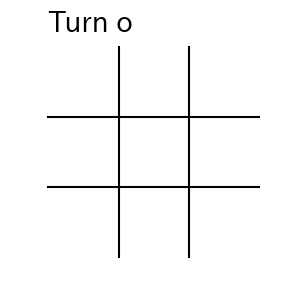

In [1]:
%matplotlib widget
from marubatsu import Marubatsu

mb = Marubatsu()
mb.play(ai=[None, None], gui=True)

In [2]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
import math

def play(self, ai, ai_list=[], params=[{}, {}], verbose=True, seed=None, gui=False, size=3):      
    # seed が None でない場合は、seed を乱数の種として設定する
    if seed is not None:
        random.seed(seed)
    
    # ai_list から、項目だけを取り出した list を作成する
    ai_values = [value for label, value in ai_list]
    # それぞれの手番の担当を表す Dropdown の項目の値を記録する list を初期化する
    select_values = []
    # ai に代入されている内容を ai_list に追加する
    for i in range(2):
        # ラベルと項目の値を計算する
        if ai[i] is None:
            label = "人間"
            value = "人間"
        else:
            label = ai[i].__name__        
            value = ai[i]
        # value が ai_values に登録済かどうかを判定する
        if value not in ai_values:
            # 項目を登録する
            ai_list.append((label, value))
            ai_values.append(value)
            select_values.append(value)
    
    # 〇 と × の Dropdown を作成する   
    dropdown_circle = widgets.Dropdown(
        options=ai_list,
        description="〇",
        layout=widgets.Layout(width="100px"),
        style={"description_width": "20px"},
        value=select_values[0],
    )
    dropdown_cross = widgets.Dropdown(
        options=ai_list,
        description="×",
        layout=widgets.Layout(width="100px"),
        style={"description_width": "20px"},
        value=select_values[1],
    )       
    
    # リセットボタンを作成する
    button = widgets.Button(
        description="リセット",
        layout=widgets.Layout(width="100px"),
    )
    
    # 〇 と × の dropdown と リセットボタンを横に配置した HBox を作成し、表示する
    hbox = widgets.HBox([dropdown_circle, dropdown_cross, button])
    display(hbox)
    
    # リセットボタンのイベントハンドラを定義する
    def on_button_clicked(b):
        self.restart()
        self.play_loop(ai=ai, ax=ax, params=params, verbose=verbose, gui=gui)           
        
    # イベントハンドラをリセットボタンに結びつける
    button.on_click(on_button_clicked)

    # gui が True の場合に、ゲーム盤を描画する画像を作成し、イベントハンドラに結びつける
    if gui:
        fig, ax = plt.subplots(figsize=[size, size])
        fig.canvas.toolbar_visible = False
        fig.canvas.header_visible = False
        fig.canvas.footer_visible = False
        fig.canvas.resizable = False          
        
        # ローカル関数としてイベントハンドラを定義する
        def on_mouse_down(event):
            # Axes の上でマウスを押していた場合のみ処理を行う
            if event.inaxes and self.status == Marubatsu.PLAYING:
                x = math.floor(event.xdata)
                y = math.floor(event.ydata)
                self.move(x, y)                
                self.draw_board(ax)

                # 次の手番の処理を行うメソッドを呼び出す
                self.play_loop(ai=ai, ax=ax, params=params, verbose=verbose, gui=gui)
                
        # fig の画像にマウスを押した際のイベントハンドラを結び付ける
        fig.canvas.mpl_connect("button_press_event", on_mouse_down)     

    self.restart()
    return self.play_loop(ai=ai, ax=ax, params=params, verbose=verbose, gui=gui)

Marubatsu.play = play

In [3]:
mb.play(ai=[None, None], gui=True)

IndexError: list index out of range

In [4]:
def play(self, ai, ai_list=[], params=[{}, {}], verbose=True, seed=None, gui=False, size=3):      
    # seed が None でない場合は、seed を乱数の種として設定する
    if seed is not None:
        random.seed(seed)
    
    # ai_list から、項目だけを取り出した list を作成する
    ai_values = [value for label, value in ai_list]
    # それぞれの手番の担当を表す Dropdown の項目の値を記録する list を初期化する
    select_values = []
    # ai に代入されている内容を ai_list に追加する
    for i in range(2):
        # ラベルと項目の値を計算する
        if ai[i] is None:
            label = "人間"
            value = "人間"
        else:
            label = ai[i].__name__        
            value = ai[i]
        # value を select_values に常に登録する
        select_values.append(value)
        # value が ai_values に登録済かどうかを判定する
        if value not in ai_values:
            # 項目を登録する
            ai_list.append((label, value))
            ai_values.append(value)
    
    # 〇 と × の Dropdown を作成する   
    dropdown_circle = widgets.Dropdown(
        options=ai_list,
        description="〇",
        layout=widgets.Layout(width="100px"),
        style={"description_width": "20px"},
        value=select_values[0],
    )
    dropdown_cross = widgets.Dropdown(
        options=ai_list,
        description="×",
        layout=widgets.Layout(width="100px"),
        style={"description_width": "20px"},
        value=select_values[1],
    )       
    
    # リセットボタンを作成する
    button = widgets.Button(
        description="リセット",
        layout=widgets.Layout(width="100px"),
    )
    
    # 〇 と × の dropdown と リセットボタンを横に配置した HBox を作成し、表示する
    hbox = widgets.HBox([dropdown_circle, dropdown_cross, button])
    display(hbox)
    
    # リセットボタンのイベントハンドラを定義する
    def on_button_clicked(b):
        self.restart()
        self.play_loop(ai=ai, ax=ax, params=params, verbose=verbose, gui=gui)           
        
    # イベントハンドラをリセットボタンに結びつける
    button.on_click(on_button_clicked)

    # gui が True の場合に、ゲーム盤を描画する画像を作成し、イベントハンドラに結びつける
    if gui:
        fig, ax = plt.subplots(figsize=[size, size])
        fig.canvas.toolbar_visible = False
        fig.canvas.header_visible = False
        fig.canvas.footer_visible = False
        fig.canvas.resizable = False          
        
        # ローカル関数としてイベントハンドラを定義する
        def on_mouse_down(event):
            # Axes の上でマウスを押していた場合のみ処理を行う
            if event.inaxes and self.status == Marubatsu.PLAYING:
                x = math.floor(event.xdata)
                y = math.floor(event.ydata)
                self.move(x, y)                
                self.draw_board(ax)

                # 次の手番の処理を行うメソッドを呼び出す
                self.play_loop(ai=ai, ax=ax, params=params, verbose=verbose, gui=gui)
                
        # fig の画像にマウスを押した際のイベントハンドラを結び付ける
        fig.canvas.mpl_connect("button_press_event", on_mouse_down)     

    self.restart()
    return self.play_loop(ai=ai, ax=ax, params=params, verbose=verbose, gui=gui)

Marubatsu.play = play

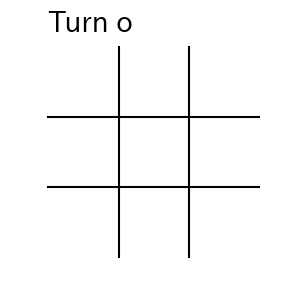

In [5]:
mb.play(ai=[None, None], gui=True)

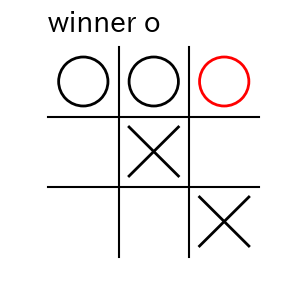

In [6]:
from ai import ai1s, ai2s

mb.play(ai=[ai1s, ai2s], gui=True);

In [7]:
def play(self, ai, ai_list=[], params=[{}, {}], verbose=True, seed=None, gui=False, size=3):      
    print("ai_list =", ai_list)
    # seed が None でない場合は、seed を乱数の種として設定する
    if seed is not None:
        random.seed(seed)
    
    # ai_list から、項目だけを取り出した list を作成する
    ai_values = [value for label, value in ai_list]
    # それぞれの手番の担当を表す Dropdown の項目の値を記録する list を初期化する
    select_values = []
    # ai に代入されている内容を ai_list に追加する
    for i in range(2):
        # ラベルと項目の値を計算する
        if ai[i] is None:
            label = "人間"
            value = "人間"
        else:
            label = ai[i].__name__        
            value = ai[i]
        # value を select_values に常に登録する
        select_values.append(value)
        # value が ai_values に登録済かどうかを判定する
        if value not in ai_values:
            # 項目を登録する
            ai_list.append((label, value))
            ai_values.append(value)
    
    # 〇 と × の Dropdown を作成する   
    dropdown_circle = widgets.Dropdown(
        options=ai_list,
        description="〇",
        layout=widgets.Layout(width="100px"),
        style={"description_width": "20px"},
        value=select_values[0],
    )
    dropdown_cross = widgets.Dropdown(
        options=ai_list,
        description="×",
        layout=widgets.Layout(width="100px"),
        style={"description_width": "20px"},
        value=select_values[1],
    )       
    
    # リセットボタンを作成する
    button = widgets.Button(
        description="リセット",
        layout=widgets.Layout(width="100px"),
    )
    
    # 〇 と × の dropdown と リセットボタンを横に配置した HBox を作成し、表示する
    hbox = widgets.HBox([dropdown_circle, dropdown_cross, button])
    display(hbox)
    
    # リセットボタンのイベントハンドラを定義する
    def on_button_clicked(b):
        self.restart()
        self.play_loop(ai=ai, ax=ax, params=params, verbose=verbose, gui=gui)           
        
    # イベントハンドラをリセットボタンに結びつける
    button.on_click(on_button_clicked)

    # gui が True の場合に、ゲーム盤を描画する画像を作成し、イベントハンドラに結びつける
    if gui:
        fig, ax = plt.subplots(figsize=[size, size])
        fig.canvas.toolbar_visible = False
        fig.canvas.header_visible = False
        fig.canvas.footer_visible = False
        fig.canvas.resizable = False          
        
        # ローカル関数としてイベントハンドラを定義する
        def on_mouse_down(event):
            # Axes の上でマウスを押していた場合のみ処理を行う
            if event.inaxes and self.status == Marubatsu.PLAYING:
                x = math.floor(event.xdata)
                y = math.floor(event.ydata)
                self.move(x, y)                
                self.draw_board(ax)

                # 次の手番の処理を行うメソッドを呼び出す
                self.play_loop(ai=ai, ax=ax, params=params, verbose=verbose, gui=gui)
                
        # fig の画像にマウスを押した際のイベントハンドラを結び付ける
        fig.canvas.mpl_connect("button_press_event", on_mouse_down)     

    self.restart()
    return self.play_loop(ai=ai, ax=ax, params=params, verbose=verbose, gui=gui)

Marubatsu.play = play

ai_list = []


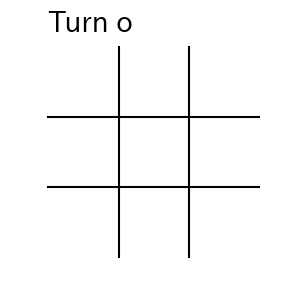

In [8]:
mb.play(ai=[None, None], gui=True);

ai_list = [('人間', '人間')]


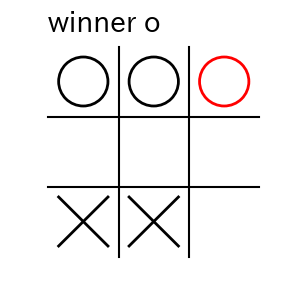

In [9]:
mb.play(ai=[ai1s, ai2s], gui=True);

In [10]:
def play(self, ai, ai_list=None, params=[{}, {}], verbose=True, seed=None, gui=False, size=3):      
    # ai_list が None の場合は、空の list で置き換える
    if ai_list is None:
        ai_list = []
   
    # seed が None でない場合は、seed を乱数の種として設定する
    if seed is not None:
        random.seed(seed)
    
    # ai_list から、項目だけを取り出した list を作成する
    ai_values = [value for label, value in ai_list]
    # それぞれの手番の担当を表す Dropdown の項目の値を記録する list を初期化する
    select_values = []
    # ai に代入されている内容を ai_list に追加する
    for i in range(2):
        # ラベルと項目の値を計算する
        if ai[i] is None:
            label = "人間"
            value = "人間"
        else:
            label = ai[i].__name__        
            value = ai[i]
        # value を select_values に常に登録する
        select_values.append(value)
        # value が ai_values に登録済かどうかを判定する
        if value not in ai_values:
            # 項目を登録する
            ai_list.append((label, value))
            ai_values.append(value)
    
    # 〇 と × の Dropdown を作成する   
    dropdown_circle = widgets.Dropdown(
        options=ai_list,
        description="〇",
        layout=widgets.Layout(width="100px"),
        style={"description_width": "20px"},
        value=select_values[0],
    )
    dropdown_cross = widgets.Dropdown(
        options=ai_list,
        description="×",
        layout=widgets.Layout(width="100px"),
        style={"description_width": "20px"},
        value=select_values[1],
    )       
    
    # リセットボタンを作成する
    button = widgets.Button(
        description="リセット",
        layout=widgets.Layout(width="100px"),
    )
    
    # 〇 と × の dropdown と リセットボタンを横に配置した HBox を作成し、表示する
    hbox = widgets.HBox([dropdown_circle, dropdown_cross, button])
    display(hbox)
    
    # リセットボタンのイベントハンドラを定義する
    def on_button_clicked(b):
        self.restart()
        self.play_loop(ai=ai, ax=ax, params=params, verbose=verbose, gui=gui)           
        
    # イベントハンドラをリセットボタンに結びつける
    button.on_click(on_button_clicked)

    # gui が True の場合に、ゲーム盤を描画する画像を作成し、イベントハンドラに結びつける
    if gui:
        fig, ax = plt.subplots(figsize=[size, size])
        fig.canvas.toolbar_visible = False
        fig.canvas.header_visible = False
        fig.canvas.footer_visible = False
        fig.canvas.resizable = False          
        
        # ローカル関数としてイベントハンドラを定義する
        def on_mouse_down(event):
            # Axes の上でマウスを押していた場合のみ処理を行う
            if event.inaxes and self.status == Marubatsu.PLAYING:
                x = math.floor(event.xdata)
                y = math.floor(event.ydata)
                self.move(x, y)                
                self.draw_board(ax)

                # 次の手番の処理を行うメソッドを呼び出す
                self.play_loop(ai=ai, ax=ax, params=params, verbose=verbose, gui=gui)
                
        # fig の画像にマウスを押した際のイベントハンドラを結び付ける
        fig.canvas.mpl_connect("button_press_event", on_mouse_down)     

    self.restart()
    return self.play_loop(ai=ai, ax=ax, params=params, verbose=verbose, gui=gui)

Marubatsu.play = play

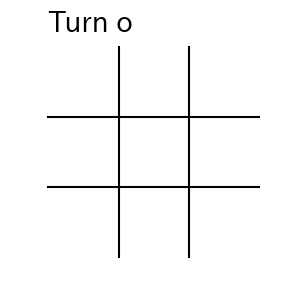

In [11]:
mb.play(ai=[None, None], gui=True);

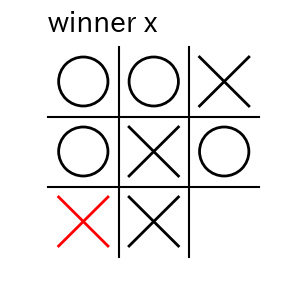

In [12]:
mb.play(ai=[ai1s, ai2s], gui=True);

In [13]:
def play(self, ai, ai_list=None, params=None, verbose=True, seed=None, gui=False, size=3):      
    # ai_list が None の場合は、空の list で置き換える
    if ai_list is None:
        ai_list = []
    # params が None の場合のデフォルト値を設定する
    if params is None:
        params = [{}, {}]
   
    # seed が None でない場合は、seed を乱数の種として設定する
    if seed is not None:
        random.seed(seed)
    
    # ai_list から、項目だけを取り出した list を作成する
    ai_values = [value for label, value in ai_list]
    # それぞれの手番の担当を表す Dropdown の項目の値を記録する list を初期化する
    select_values = []
    # ai に代入されている内容を ai_list に追加する
    for i in range(2):
        # ラベルと項目の値を計算する
        if ai[i] is None:
            label = "人間"
            value = "人間"
        else:
            label = ai[i].__name__        
            value = ai[i]
        # value を select_values に常に登録する
        select_values.append(value)
        # value が ai_values に登録済かどうかを判定する
        if value not in ai_values:
            # 項目を登録する
            ai_list.append((label, value))
            ai_values.append(value)
    
    # 〇 と × の Dropdown を作成する   
    dropdown_circle = widgets.Dropdown(
        options=ai_list,
        description="〇",
        layout=widgets.Layout(width="100px"),
        style={"description_width": "20px"},
        value=select_values[0],
    )
    dropdown_cross = widgets.Dropdown(
        options=ai_list,
        description="×",
        layout=widgets.Layout(width="100px"),
        style={"description_width": "20px"},
        value=select_values[1],
    )       
    
    # リセットボタンを作成する
    button = widgets.Button(
        description="リセット",
        layout=widgets.Layout(width="100px"),
    )
    
    # 〇 と × の dropdown と リセットボタンを横に配置した HBox を作成し、表示する
    hbox = widgets.HBox([dropdown_circle, dropdown_cross, button])
    display(hbox)
    
    # リセットボタンのイベントハンドラを定義する
    def on_button_clicked(b):
        self.restart()
        self.play_loop(ai=ai, ax=ax, params=params, verbose=verbose, gui=gui)           
        
    # イベントハンドラをリセットボタンに結びつける
    button.on_click(on_button_clicked)

    # gui が True の場合に、ゲーム盤を描画する画像を作成し、イベントハンドラに結びつける
    if gui:
        fig, ax = plt.subplots(figsize=[size, size])
        fig.canvas.toolbar_visible = False
        fig.canvas.header_visible = False
        fig.canvas.footer_visible = False
        fig.canvas.resizable = False          
        
        # ローカル関数としてイベントハンドラを定義する
        def on_mouse_down(event):
            # Axes の上でマウスを押していた場合のみ処理を行う
            if event.inaxes and self.status == Marubatsu.PLAYING:
                x = math.floor(event.xdata)
                y = math.floor(event.ydata)
                self.move(x, y)                
                self.draw_board(ax)

                # 次の手番の処理を行うメソッドを呼び出す
                self.play_loop(ai=ai, ax=ax, params=params, verbose=verbose, gui=gui)
                
        # fig の画像にマウスを押した際のイベントハンドラを結び付ける
        fig.canvas.mpl_connect("button_press_event", on_mouse_down)     

    self.restart()
    return self.play_loop(ai=ai, ax=ax, params=params, verbose=verbose, gui=gui)

Marubatsu.play = play

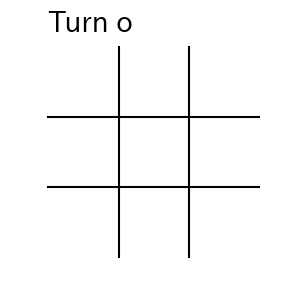

In [14]:
mb.play(ai=[None, None], gui=True)

In [15]:
def play_loop(self, ai, ax, params, verbose, gui):
    # ゲームの決着がついていない間繰り返す
    while self.status == Marubatsu.PLAYING:
        # 現在の手番を表す ai のインデックスを計算する
        index = 0 if self.turn == Marubatsu.CIRCLE else 1
        # ゲーム盤の表示
        if verbose:
            if gui:
                # AI どうしの対戦の場合は画面を描画しない
                if ai[0] is None or ai[1] is None:
                    self.draw_board(ax)
                # 手番を人間が担当する場合は、play メソッドを終了する
                if ai[index] is None:
                    return
            else:
                print(self)
                
        # ai が着手を行うかどうかを判定する
        if ai[index] is not None:
            x, y = ai[index](self, **params[index])
        else:
            # キーボードからの座標の入力
            coord = input("x,y の形式で座標を入力して下さい。exit を入力すると終了します")
            # "exit" が入力されていればメッセージを表示して関数を終了する
            if coord == "exit":
                print("ゲームを終了します")
                return       
            # x 座標と y 座標を要素として持つ list を計算する
            xylist = coord.split(",")
            # xylist の要素の数が 2 ではない場合
            if len(xylist) != 2:
                # エラーメッセージを表示する
                print("x, y の形式ではありません")
                # 残りの while 文のブロックを実行せずに、次の繰り返し処理を行う
                continue
            x, y = xylist
        # (x, y) に着手を行う
        try:
            self.move(int(x), int(y))
        except:
            print("整数の座標を入力して下さい")

    # 決着がついたので、ゲーム盤を表示する
    if verbose:
        if gui:
            self.draw_board(ax)
        else:
            print(self)
            
    return self.status   

Marubatsu.play_loop = play_loop

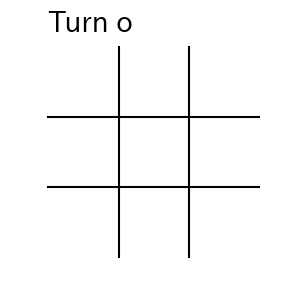

In [16]:
mb.play(ai=[None, None], gui=True)

In [17]:
def a(x=[]):
    print(x)
    b(x)

def b(x):
    x.append(1)

a()
a()

[]
[1]


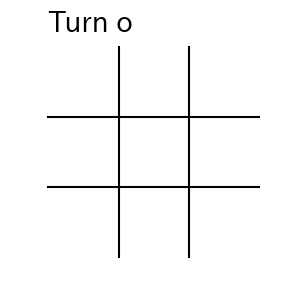

In [18]:
import ai

# Dropdown の作成の際に必要となる、AI のリストを作成する    
ai_list = []
for i in range(1, 15):
    ai_name = f"ai{i}s"  
    ai_list.append((ai_name, getattr(ai, ai_name)))   

mb.play(ai=[None, None], ai_list=ai_list, gui=True)

In [19]:
import ai as ai_module

def gui_play(ai=None, ai_list=None):
    # ai が None の場合は、人間どうしの対戦を行う
    if ai is None:
        ai = [None, None]
    # ai_list が None の場合は、ai1s ~ ai14s の Dropdown を作成するためのデータを計算する
    if ai_list is None:
        ai_list = []
        for i in range(1, 15):
            ai_name = f"ai{i}s"  
            ai_list.append((ai_name, getattr(ai_module, ai_name)))    
    
    mb = Marubatsu()
    mb.play(ai=ai, ai_list=ai_list, gui=True)

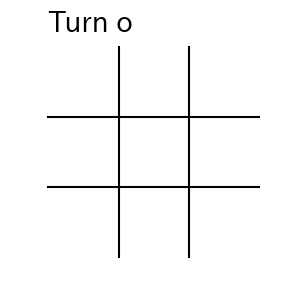

In [20]:
gui_play()

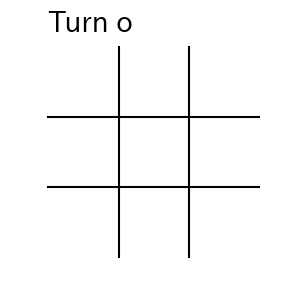

In [21]:
gui_play(ai=[None, ai1s])

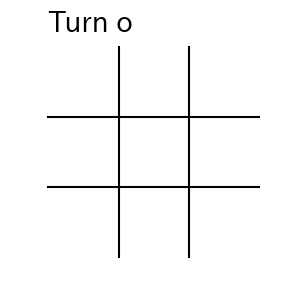

In [22]:
gui_play(ai_list=[("ai1s", ai.ai1s)])

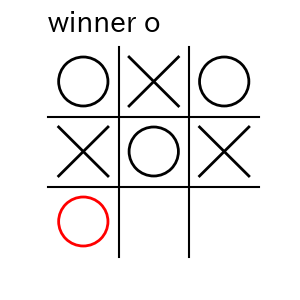

In [23]:
gui_play(ai=[ai1s, ai1s])

In [24]:
def gui_play(ai=None, ai_list=None):
    # ai が None の場合は、人間どうしの対戦を行う
    if ai is None:
        ai = [None, None]
    # ai_list が None の場合は、人間と ai1s ~ ai14s の Dropdown を作成するためのデータを計算する  
    if ai_list is None:
        ai_list = [("人間", "人間")]
        for i in range(1, 15):
            ai_name = f"ai{i}s"  
            ai_list.append((ai_name, getattr(ai_module, ai_name)))    
    
    mb = Marubatsu()
    mb.play(ai=ai, ai_list=ai_list, gui=True)

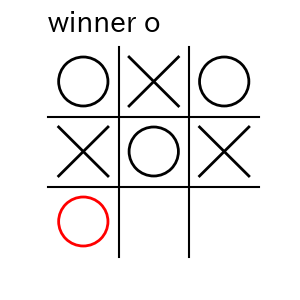

In [25]:
gui_play(ai=[ai1s, ai1s])

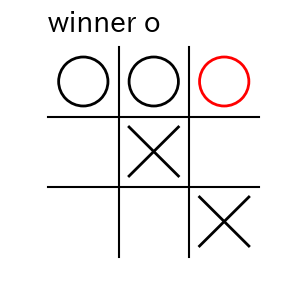

In [26]:
from ai import ai1, ai2

gui_play(ai=[ai1, ai2])

In [27]:
def play(self, ai, ai_dict=None, params=None, verbose=True, seed=None, gui=False, size=3):      
    # ai_dict が None の場合は、空の list で置き換える
    if ai_dict is None:
        ai_dict = {}
    # params が None の場合のデフォルト値を設定する
    if params is None:
        params = [{}, {}]
   
    # seed が None でない場合は、seed を乱数の種として設定する
    if seed is not None:
        random.seed(seed)
    
    # それぞれの手番の担当を表す Dropdown の項目の値を記録する list を初期化する
    select_values = []
    # ai に代入されている内容を ai_dict に追加する
    for i in range(2):
        # ラベルと項目の値を計算する
        if ai[i] is None:
            label = "人間"
            value = "人間"
        else:
            label = ai[i].__name__        
            value = ai[i]
        # value を select_values に常に登録する
        select_values.append(value)
        # value が ai_values に登録済かどうかを判定する
        if value not in ai_dict.values():
            # 項目を登録する
            ai_dict[label] = value
    
    # 〇 と × の Dropdown を作成する   
    dropdown_circle = widgets.Dropdown(
        options=ai_dict,
        description="〇",
        layout=widgets.Layout(width="100px"),
        style={"description_width": "20px"},
        value=select_values[0],
    )
    dropdown_cross = widgets.Dropdown(
        options=ai_dict,
        description="×",
        layout=widgets.Layout(width="100px"),
        style={"description_width": "20px"},
        value=select_values[1],
    )       
    
    # リセットボタンを作成する
    button = widgets.Button(
        description="リセット",
        layout=widgets.Layout(width="100px"),
    )
    
    # 〇 と × の dropdown と リセットボタンを横に配置した HBox を作成し、表示する
    hbox = widgets.HBox([dropdown_circle, dropdown_cross, button])
    display(hbox)
    
    # リセットボタンのイベントハンドラを定義する
    def on_button_clicked(b):
        self.restart()
        self.play_loop(ai=ai, ax=ax, params=params, verbose=verbose, gui=gui)           
        
    # イベントハンドラをリセットボタンに結びつける
    button.on_click(on_button_clicked)

    # gui が True の場合に、ゲーム盤を描画する画像を作成し、イベントハンドラに結びつける
    if gui:
        fig, ax = plt.subplots(figsize=[size, size])
        fig.canvas.toolbar_visible = False
        fig.canvas.header_visible = False
        fig.canvas.footer_visible = False
        fig.canvas.resizable = False          
        
        # ローカル関数としてイベントハンドラを定義する
        def on_mouse_down(event):
            # Axes の上でマウスを押していた場合のみ処理を行う
            if event.inaxes and self.status == Marubatsu.PLAYING:
                x = math.floor(event.xdata)
                y = math.floor(event.ydata)
                self.move(x, y)                
                self.draw_board(ax)

                # 次の手番の処理を行うメソッドを呼び出す
                self.play_loop(ai=ai, ax=ax, params=params, verbose=verbose, gui=gui)
                
        # fig の画像にマウスを押した際のイベントハンドラを結び付ける
        fig.canvas.mpl_connect("button_press_event", on_mouse_down)     

    self.restart()
    return self.play_loop(ai=ai, ax=ax, params=params, verbose=verbose, gui=gui)

Marubatsu.play = play

In [28]:
def gui_play(ai=None, ai_dict=None):
    # ai が None の場合は、人間どうしの対戦を行う
    if ai is None:
        ai = [None, None]
    # ai_dict が None の場合は、ai1s ~ ai14s の Dropdown を作成するためのデータを計算する
    if ai_dict is None:
        ai_dict = { "人間": "人間"}
        for i in range(1, 15):
            ai_name = f"ai{i}s"  
            ai_dict[ai_name] = getattr(ai_module, ai_name)
    
    mb = Marubatsu()
    mb.play(ai=ai, ai_dict=ai_dict, gui=True)

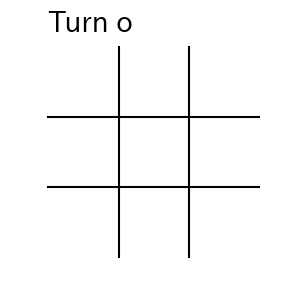

In [29]:
gui_play()